In [4]:
from tests.heat_eqn.save_experiments import ExperimentData
from tests.heat_eqn.rescale_solutions import load_rescaled_data
from tests.heat_eqn.save_experiments import load_experiment_data
# from tests.heat_eqn.plotting import (plot_1d_evolution_periodic_bc,
#                                      plot_1d_evolution_zero_bc,
#                                      add_time_color_bar,
#                                      add_text,
#                                      plot_stat_figures,
#                                      time_colormap
#                                      )
from tests.heat_eqn.plotting import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [474]:
a4_width  = 8.3
a4_height = 11.7

figpath = 'figs/heat_eqn/PaperFigs/'

import os
if not os.path.exists(figpath):
    os.makedirs(figpath)

# Solutions to 1D Heat Equation

In [481]:
from tests.heat_eqn.input_handler import get_inputs

files = ['6 qubit square wave', '6 qubit triangle wave']
expt_datas = [load_rescaled_data('data/heat_eqn/PaperData/', file, 10) for file in files]

# for expt in get_inputs('0.8_alpha.json'):
#     print(expt.f0)

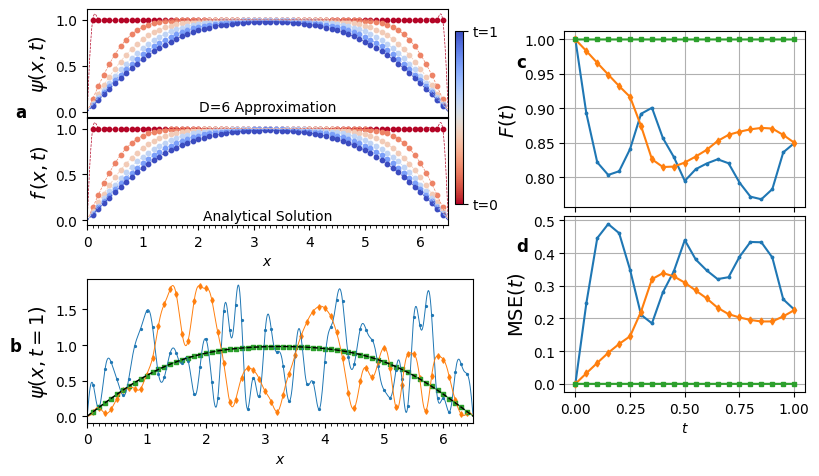

In [224]:

# expt_data = load_experiment_data('data/heat_eqn/PaperData/', '6 qubit square wave')
# Nt = np.int32(np.ceil(expt_data.T/expt_data.dt))
# Nx = expt_data.f0.shape[0]
expt_data = expt_datas[0]
Nd,Nt,Nx = expt_data.qite_sols.shape
expt_data.periodic_bc_flag
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/2.5
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

sol_fig, stat_fig = figure.subfigures(1, 2, width_ratios=[1.5,1], wspace=0.0)

evo_fig, d_fig = sol_fig.subfigures(2,1, height_ratios=[1.5,1])

evo_axs = evo_fig.subplots(2,1,sharex=True)
d_ax = d_fig.subplots(1)
stat_axs = stat_fig.subplots(2,1,sharex=True)

plot_1d_evolution(evo_axs[0],
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.qite_sols[-1],
                  sample_x:=(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx[0],
                  expt_data.dx[0], expt_data.L[0],
                  times:=np.arange(0,Nt+1)*expt_data.dt,
                  plot_times:=np.arange(0,Nt+1,(Nt+1)//5))
plot_1d_evolution(evo_axs[1], 
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.analytical_sol,
                  sample_x,
                  expt_data.dx[0], expt_data.L[0],
                  times, plot_times)

add_text(evo_axs[0],0.5,0.05,f'D={expt_data.D_list[-1]} Approximation',size=10,horizontalalignment='center')
add_text(evo_axs[1],0.5,0.05,f'Analytical Solution',size=10,horizontalalignment='center')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,expt_data.T), cmap=time_colormap),
             ax=evo_axs.ravel().tolist(),
             location='right',orientation='vertical',
             shrink=0.8,aspect=20,anchor=(0.8,0.5))
cb.set_ticks([0,expt_data.T])
cb.set_ticklabels(['t=0', 't=1'])

# xrange =(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx) )*expt_data.dx
dense_x = np.arange(0,expt_data.L[0]+expt_data.dx[0]/10,expt_data.dx[0]/10)

for Di,D in enumerate(expt_data.D_list):
    qsol = expt_data.qite_sols[Di][-1]
    
    iqsol = get_interpolation_1d(qsol, expt_data.num_qbits[0],
                                 expt_data.periodic_bc_flag[0],
                                 dense_x, expt_data.L[0])
    
    l, = d_ax.plot(dense_x, iqsol, label=f'{D=}', linewidth=0.7, alpha=1.0)
    d_ax.scatter(sample_x,qsol, marker=plt_markers[Di], color=l.get_color(), s=7)

asol = expt_data.analytical_sol[-1]
iasol = get_interpolation_1d(asol,expt_data.num_qbits[0],
                             expt_data.periodic_bc_flag[0], 
                             dense_x, expt_data.L[0])

d_ax.plot(dense_x, iasol, label='$f\,(x,1)$', linewidth=1.0, linestyle='--', color='k')

for Di,D in enumerate(expt_data.D_list):
    stat_axs[0].plot(times[time_slice], expt_data.stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
    stat_axs[1].plot(times[time_slice], expt_data.stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')

stat_axs[0].grid(True)
stat_axs[1].grid(True)

evo_axs[0].set_xlim([0.0,expt_data.L[0]])
evo_axs[0].set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
d_ax.set_xlim([0.0, expt_data.L[0]])
d_ax.set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
# d_ax.set_ylim([-0.2, 2.2])

# stat_axs[0].set_ylim([0.65,1.01])

evo_axs[0].set_ylabel(r'$\psi(x,t)$', fontsize=14)
evo_axs[1].set_ylabel(r'$f\,(x,t)$', fontsize=14)
d_ax.set_ylabel(r'$\psi(x,t=1)$', fontsize=14)

stat_axs[0].set_ylabel(r'$F(t)$', fontsize=14)
stat_axs[1].set_ylabel(r'MSE$(t)$', fontsize=14)

evo_axs[-1].set_xlabel(r'$x$')
d_ax.set_xlabel(r'$x$')
# stat_axs[0].set_xlabel('$t$')
stat_axs[1].set_xlabel('$t$')

evo_fig.subplots_adjust(hspace=0.01,right=0.85)
stat_fig.subplots_adjust(hspace=0.05)#,top=0.75,bottom=0.25,wspace=0.5)

add_text(evo_axs[0], -0.2, 0.0, 'a', weight='bold')
add_text(d_ax, -0.2, 0.5, 'b', weight='bold')
add_text(stat_axs[0], -0.2, 0.8, 'c', weight='bold')
add_text(stat_axs[1], -0.2, 0.8, 'd', weight='bold')

figpath = 'figs/heat_eqn/paper_figs/'
figname = 'square_wave'
# plt.savefig(figpath+figname+'.svg',dpi=300, bbox_inches='tight')
# plt.savefig(figpath+figname+'.png',dpi=300, bbox_inches='tight')

plt.show()

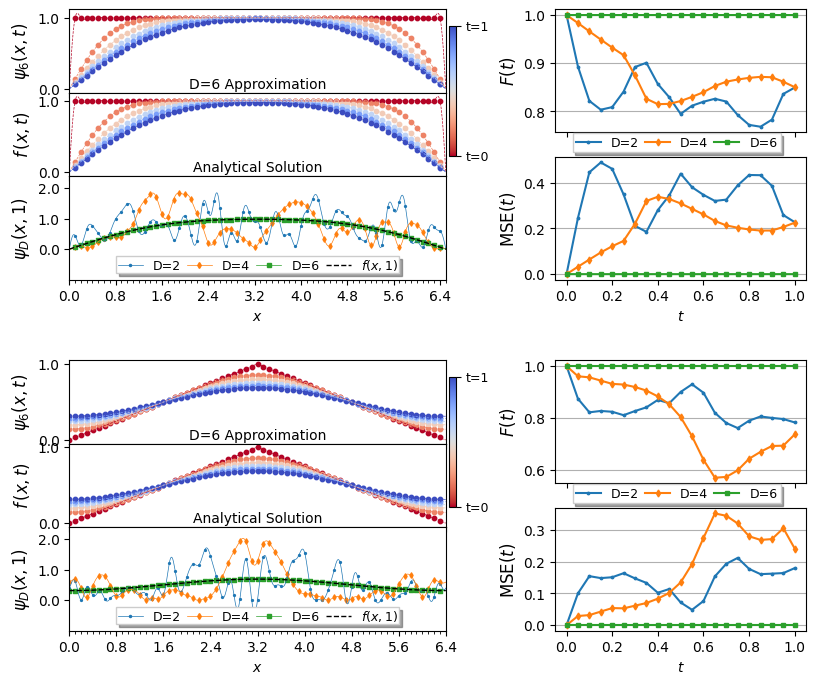

In [482]:
from matplotlib import ticker, lines

a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 0.6

Nd,Nt,Nx = expt_datas[0].qite_sols.shape

tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

fig = plt.figure(figsize=(a4_width,a4_height*fig_height_ratio))

squ_fig, tri_fig = fig.subfigures(2,1,height_ratios=[1,1])

subFigs = [squ_fig, tri_fig]



for i, expt_data in enumerate(expt_datas):
    subFig = subFigs[i]

    sol_fig, stat_fig = subFig.subfigures(1,2,width_ratios=[3,2],wspace=0.05)

    sol_axs = sol_fig.subplots(3,1,sharex=True,height_ratios=[1,1,1.25])
    stat_axs = stat_fig.subplots(2,1,sharex=True)

    plot_1d_evolution(sol_axs[0],
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.qite_sols[-1],
                  sample_x:=(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx[0],
                  expt_data.dx[0], expt_data.L[0],
                  times:=np.arange(0,Nt+1)*expt_data.dt,
                  plot_times:=np.arange(0,Nt+1,(Nt+1)//5))
    plot_1d_evolution(sol_axs[1], 
                    expt_data.f0,
                    expt_data.num_qbits[0],
                    expt_data.periodic_bc_flag[0],
                    expt_data.analytical_sol,
                    sample_x,
                    expt_data.dx[0], expt_data.L[0],
                    times, plot_times)

    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,expt_data.T), cmap=time_colormap),
             ax=sol_axs[:-1].ravel().tolist(),
             location='right',orientation='vertical',
             shrink=0.8,aspect=20,anchor=(1.2,0.5))
    cb.set_ticks([0,expt_data.T])
    cb.set_ticklabels(['t=0', 't=1'],fontsize=9)

    add_text(sol_axs[0],0.5,0.05,f'D={expt_data.D_list[-1]} Approximation',size=10,horizontalalignment='center')
    add_text(sol_axs[1],0.5,0.05,f'Analytical Solution',size=10,horizontalalignment='center')

    dense_x = np.arange(0,expt_data.L[0]+expt_data.dx[0]/10,expt_data.dx[0]/10)
    d_ax = sol_axs[-1]

    for Di,D in enumerate(expt_data.D_list):
        qsol = expt_data.qite_sols[Di][-1]
        
        iqsol = get_interpolation_1d(qsol, expt_data.num_qbits[0],
                                    expt_data.periodic_bc_flag[0],
                                    dense_x, expt_data.L[0])
        
        l, = d_ax.plot(dense_x, iqsol, linewidth=0.5, alpha=1.0)
        d_ax.scatter(sample_x,qsol, marker=plt_markers[Di], color=l.get_color(), s=7, label=f'{D=}')

        asol = expt_data.analytical_sol[-1]
        iasol = get_interpolation_1d(asol,expt_data.num_qbits[0],
                                    expt_data.periodic_bc_flag[0], 
                                    dense_x, expt_data.L[0])

    d_ax.plot(dense_x, iasol, label='$f\,(x,1)$', linewidth=1.0, linestyle='--', color='k')

    sol_axs[1].sharex(sol_axs[0])
    d_ax.set_xlim([0.0, expt_data.L[0]])
    d_ax.set_xticks(np.arange(0.0,expt_data.L[0]+expt_data.dx[0],expt_data.dx[0]),minor=True)
    d_ax.set_xticks(np.arange(0.0,expt_data.L[0]+expt_data.dx[0],0.8),minor=False)
    for ax in sol_axs:
        ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:0.1f}'))
    d_ax.set_yticks(np.linspace(0.0,ymax:=np.ceil(np.max(expt_data.qite_sols[:,-1,:])),3))
    
    d_ax.set_ylim([-1.0,ymax+0.4])
    

    sol_axs[0].set_ylabel(f'$\\psi_6(x,t)$',fontsize=12)
    sol_axs[1].set_ylabel(r'$f\,(x,t)$',fontsize=12)
    sol_axs[2].set_ylabel(f'$\\psi_D(x,1)$',fontsize=12)
    sol_axs[2].set_xlabel('$x$')

    stat_axs[0].set_ylabel(r'$F(t)$',fontsize=12)
    stat_axs[1].set_ylabel(r'MSE$(t)$',fontsize=12)
    stat_axs[1].set_xlabel(r'$t$')

    for Di,D in enumerate(expt_data.D_list):
        stat_axs[0].plot(times[time_slice], expt_data.stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
        stat_axs[1].plot(times[time_slice], expt_data.stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')

    stat_axs[0].grid(True,axis='y')
    stat_axs[1].grid(True,axis='y')

    sol_fig.subplots_adjust(hspace=0.0)
    stat_fig.subplots_adjust(hspace=0.1)

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    custom_lines = [
        lines.Line2D([0],[0],linewidth=0.5,marker=plt_markers[0],color=colors[0],markersize=3),
        lines.Line2D([0],[0],linewidth=0.5,marker=plt_markers[1],color=colors[1],markersize=3),
        lines.Line2D([0],[0],linewidth=0.5,marker=plt_markers[2],color=colors[2],markersize=3),
        lines.Line2D([0],[0],linewidth=1.0,linestyle='--',color='k')
    ]
    d_ax.legend(custom_lines, ['D=2','D=4','D=6','$f(x,1)$'],
                ncols=4,fontsize=9,
                loc='lower center',
                columnspacing=0.5,
                borderpad=0.1,fancybox=False,shadow=True)
    
    custom_lines = [
        lines.Line2D([0],[0],marker=plt_markers[0],color=colors[0],markersize=3.5),
        lines.Line2D([0],[0],marker=plt_markers[1],color=colors[1],markersize=3.5),
        lines.Line2D([0],[0],marker=plt_markers[2],color=colors[2],markersize=3.5),
    ]
    stat_fig.legend(custom_lines, ['D=2','D=4','D=6'],
                    ncols=3,fontsize=9,
                    loc='center',
                    columnspacing=0.5,borderpad=0.25,
                    fancybox=False,shadow=True)
    # stat_axs[0].legend(loc='lower left',fancybox=False,shadow=True,labelspacing=0.1,fontsize=9,borderpad=0.2)
    # stat_axs[1].legend(loc='upper left',fancybox=False,shadow=True,labelspacing=0.1,fontsize=9,borderpad=0.2)
    # stat_axs[0].set_ylim([fmin:=0.5,1.05])
    # stat_axs[1].set_ylim([-0.01,mmax:=1.0])
    # stat_axs[0].set_yticks(np.linspace(fmin,1.0,6))
    # stat_axs[1].set_yticks(np.linspace(0.0,mmax,5))
    stat_fig.subplots_adjust(hspace=0.2)
    
figname='1d_solutions'

plt.savefig(figpath+figname+'.svg',dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png',dpi=300, bbox_inches='tight')

plt.show()

# Effect of K on log norm ratio

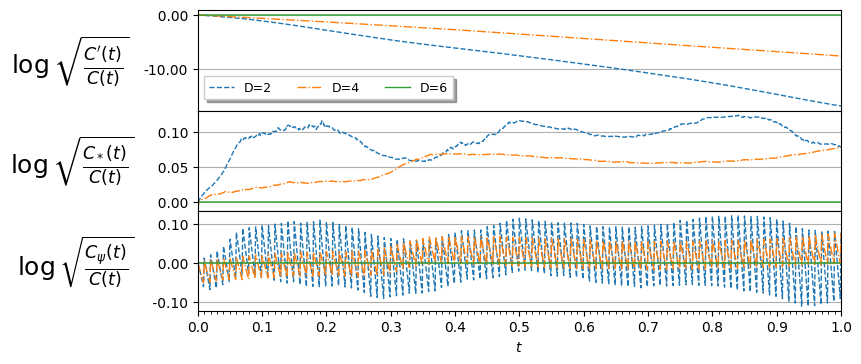

In [475]:
import h5py

Ks = [1,10]
log_ratios = np.zeros((len(Ks)+1,3,1001),np.float64)
means = np.zeros((3, len(Ks)),np.float64)

# with h5py.File('data/heat_eqn/PaperData/2D Triangle Wave 5x5 qubits.hdf5') as file:
with h5py.File('data/heat_eqn/PaperData/6 qubit square wave.hdf5') as file:
    log_ratios[0][:] = -file['stats/log_norm_ratio'][:]
    for ki,K in enumerate(Ks):
        log_ratios[ki+1][:] = file[f'stats/rescaled_stats/{K=}/log_norm_ratio'][:]
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/3

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

# topFig,bottomFig = figure.subfigures(2,1,height_ratios=[1,4],hspace=0.2)
f_axs = figure.subplots(3,1,sharex=True)

time_slice = slice(None,None,None)
styles = [
    'dashed','dashdot','solid'
]

# t_ax = topFig.subplots(1)
t_ax = f_axs[0]
for Di,D in enumerate(expt_data.D_list):
    t_ax.plot(times[time_slice],log_ratios[0,Di][time_slice]/np.log(10), label=f'{D=}',linestyle=styles[Di], linewidth=1.0)#, marker=plt_markers[Di], ms=3)

# t_ax.set_ylabel(r'$\ln \frac{C^\prime(t)}{C(t)}$')
# t_ax.set_xlabel('t')
# t_ax.set_ylim([-0.05,0.1])
t_ax.grid(True,axis='y')

# axs = bottomFig.subplots(2,2,sharex=True)
axs = f_axs.T[1:]
for i,ax in enumerate(axs.flatten()):
    for Di,D in enumerate(expt_data.D_list):
        ax.plot(times[time_slice], q:=log_ratios[i+1,Di,time_slice]/np.log(10), linestyle=styles[Di], linewidth=1.0)
        means[Di,i] = np.mean(q)
        # if i%2 == 1:
            # ax.yaxis.set_label_position('right')
            # ax.yaxis.tick_right()
        # ax.set_title(f'K={Ks[i]}',fontsize=8,loc='left',y=0.9)
        ax.grid(True,axis='y')
# axs[1,0].set_xlabel('t')
# axs[1,1].set_xlabel('t')

# figure.subplots_adjust(hspace=0.1, wspace=0.25)
# topFig.subplots_adjust(left=0.15,right=0.75)
# bottomFig.subplots_adjust(left=0.15,right=0.9,hspace=0.35, wspace=0.05)

f_axs[0].set_ylabel(r'$\log \sqrt{\frac{C^\prime(t)}{C(t)}}$', fontsize=18,rotation=0, ha='right', va='center',labelpad=10)
f_axs[1].set_ylabel(r'$\log \sqrt{\frac{C_*(t)}{C(t)}}$', fontsize=18,rotation=0, ha='right', va='center',labelpad=10)
f_axs[2].set_ylabel(r'$\log \sqrt{\frac{C_\psi(t)}{C(t)}}$', fontsize=18,rotation=0, ha='right', va='center',labelpad=10)

# topFig.legend(bbox_to_anchor=(0.9,0.65))

# add_text(t_ax, -0.1, 0.9, 'a', weight='bold')
# add_text(axs[0,0],-0.2, 0.9, 'b', weight='bold')

t_ax.set_xlim([0,1])
t_ax.set_xticks(np.arange(0.0,1.1,0.1))
t_ax.set_xticks(np.arange(0.0,1.0,0.01),minor=True)
# axs[0,0].set_xlim([-0.01,1.01])

for ax in f_axs:
    ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:6.2f}'))

figure.subplots_adjust(hspace=0.0)
# t_ax.set_ylim([-21,1])
f_axs[-1].set_xlabel('$t$')
t_ax.legend(ncols=3,fancybox=False,shadow=True,fontsize=9,loc='lower left', bbox_to_anchor=(0,0.05))
# figure.legend(ncols=3,fancybox=False,shadow=True,fontsize=10,loc='lower right', bbox_to_anchor=(0.66,-0.1))

figname='K_effect'
plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight')

plt.show()

In [465]:
for Di,D in enumerate(expt_data.D_list):
    print(f'{D=}')
    for Ki,K in enumerate(Ks):
        print(f'    {K=:2d} | |Mean Log Ratio| = {np.abs(means[Di,Ki]):0.5f}')

D=2
    K= 1 | |Mean Log Ratio| = 0.13224
    K=10 | |Mean Log Ratio| = 0.02943
D=4
    K= 1 | |Mean Log Ratio| = 0.04817
    K=10 | |Mean Log Ratio| = 0.01000
D=6
    K= 1 | |Mean Log Ratio| = 0.00058
    K=10 | |Mean Log Ratio| = 0.00055


# Solutions to 2D Heat Equation

In [477]:
from tests.heat_eqn.save_experiments import ExperimentData, load_experiment_data
from tests.heat_eqn.rescale_solutions import updateExperimentData
files = ['2D Square Wave 5x5 qubits', '2D Triangle Wave 5x5 qubits']# 'Inverted Parabola on x, Triangle Wave on y 5x5 qubits']

expt_datas = [updateExperimentData('data/heat_eqn/PaperData/',file, 10) for file in files]

from tests.heat_eqn.plotting import plot_2d_state
# def plot_2d_state(ax:'Axes',expt_data:ExperimentData, psi:np.ndarray[float]):
#     if expt_data.periodic_bc_flag[0]:
#         Nx = 32
#         Mx_slice = slice(0,32)
#     else:
#         Nx = 34
#         Mx_slice = slice(1,33)
#     if expt_data.periodic_bc_flag[1]:
#         Ny = 32
#         My_slice = slice(0,32)
#     else:
#         Ny = 34
#         My_slice = slice(1,33)
    
    

#     m = np.zeros((Ny,Nx),np.float64)
#     m[My_slice,Mx_slice] = psi.reshape(32,32)

#     ax.imshow(m, cmap='coolwarm', interpolation='none', extent = [0.0, expt_data.L[0], 0.0, expt_data.L[1]], vmin=0.0, vmax = np.max(psi))
#     return np.max(psi)

# print(expt_datas[0].periodic_bc_flag)
# fig,ax = plt.subplots(1)
# plot_2d_state(ax,expt_datas[0], expt_datas[0].f0)
# plt.show()

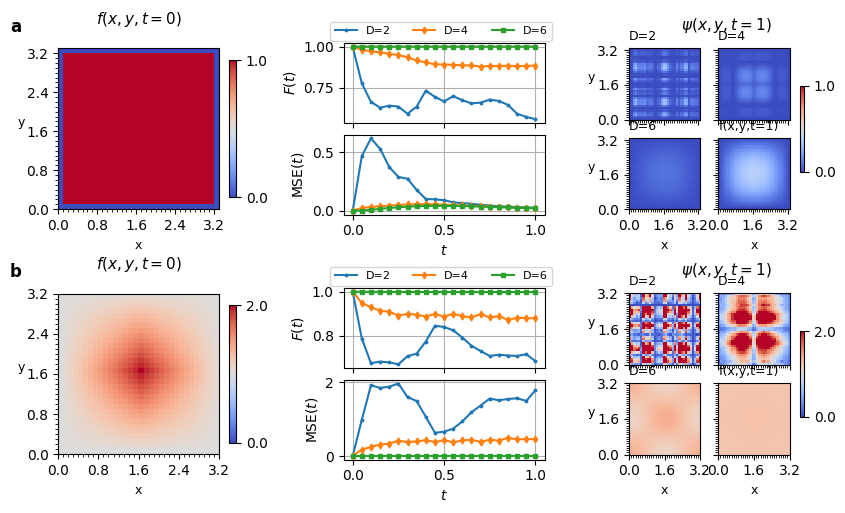

In [352]:
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 0.8/2
figure = plt.figure(figsize=(a4_width,a4_height*fig_height_ratio))

subFigs = figure.subfigures(len(files),1,height_ratios=[1]*len(files),hspace=0.1)

Nt = 1001
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

cbar_lims = [ 1.0, 2.0, 3.5 ] 

for i, subFig in enumerate(subFigs):
    f0Fig, statFig, fTFig = subFig.subfigures(1,3,width_ratios=[1,1,1],wspace=0.1)
    f0Ax = f0Fig.subplots(1)
    fTAxs = fTFig.subplots(2,2, sharex=True,sharey=True)
    statAxs = statFig.subplots(2,1,sharex=True)

    f0Ax.set_aspect(1)
    for ax in fTAxs.flatten():
        ax.set_aspect(1)

    f0Ax.set_title(r'$f(x,y,t=0)$',fontsize=11,y=1.1)

    f0Ax.set_xlabel('x',fontsize=9)
    f0Ax.set_ylabel('y',fontsize=9,rotation=0)

    fTFig.suptitle(r'$\psi(x,y,t=1)$',fontsize=11,y=1)
    fTAxs[0,0].set_title('D=2',fontsize=9,loc='left')
    fTAxs[0,1].set_title('D=4',fontsize=9,loc='left')
    fTAxs[1,0].set_title('D=6',fontsize=9,loc='left')
    fTAxs[1,1].set_title('f(x,y,t=1)',fontsize=9,loc='left')
    
    fTAxs[0,0].set_ylabel('y',fontsize=9,rotation=0)
    fTAxs[1,0].set_ylabel('y',fontsize=9,rotation=0)
    fTAxs[1,0].set_xlabel('x',fontsize=9)
    fTAxs[1,1].set_xlabel('x',fontsize=9)

    statAxs[0].set_ylabel('$F(t)$',fontsize=10)
    statAxs[1].set_ylabel('MSE$(t)$',fontsize=10)
    statAxs[1].set_xlabel('$t$',fontsize=10)

    fTFig.subplots_adjust(hspace=0.1,wspace=0.25)
    statFig.subplots_adjust(hspace=0.15)

    add_text(f0Ax, -0.3, 1.1, chr(ord('a')+i), weight='bold')

    # f0Ax.imshow(expt_datas[i].f0.reshape(32,32), 
    #             cmap='gray', interpolation='none', 
    #             extent=[0.0, expt_datas[i].L[0], 0.0, expt_datas[i].L[1]],
    #             vmin=cbar_lims[i][0],
    #             vmax=cbar_lims[i][1])
    # print(expt_datas[i].f0, expt_datas[i].num_qbits, 
    #               expt_datas[i].periodic_bc_flag, 
    #               expt_datas[i].L)
    plot_2d_state(f0Ax, expt_datas[i].f0, expt_datas[i].num_qbits, 
                  expt_datas[i].periodic_bc_flag, 
                  expt_datas[i].L,
                  vmin=0.0, vmax=cbar_lims[i])

    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0.0,cbar_lims[i]), cmap='coolwarm'),
                        ax=f0Ax,
                        location='right',orientation='vertical',
                        shrink=0.8,aspect=20)
    cb.set_ticks([0.0,cbar_lims[i]])
    cb.set_ticklabels([f'{0.0:0.1f}', f'{cbar_lims[i]:0.1f}'])

    for j, ax in enumerate(fTAxs.flatten()):
        # plot_2d_state(ax, expt_datas[i], expt_datas[i].qite_sols[j,-1,:] if j < 3 else expt_datas[i].analytical_sol[-1,:])
        plot_2d_state(ax, expt_datas[i].qite_sols[j,-1,:] if j < 3 else expt_datas[i].analytical_sol[-1,:], expt_datas[i].num_qbits, expt_datas[i].periodic_bc_flag, expt_datas[i].L, vmin=0.0, vmax=cbar_lims[i])
    
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0.0,cbar_lims[i]), cmap='coolwarm'),
                        ax=fTAxs.ravel().tolist(),
                        location='right',orientation='vertical',
                        shrink=0.5,aspect=20)
    cb.set_ticks([0.0,cbar_lims[i]])
    cb.set_ticklabels([f'{0.0:0.1f}', f'{cbar_lims[i]:0.1f}'])

    for Di,D in enumerate(expt_datas[i].D_list):
        statAxs[0].plot(times[time_slice], expt_datas[i].stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
        statAxs[1].plot(times[time_slice], expt_datas[i].stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5)#, label=f'{D=}')

    statFig.legend(ncol=3, bbox_to_anchor=(0.95,1.0),fontsize=8)#, fancybox=True, shadow=True)
    # statAxs[1].legend(loc='upper left')#, fancybox=True, shadow=True)

    statAxs[0].grid(True)
    statAxs[1].grid(True)

    f0Ax.set_xticks(np.arange(0,33,8)*expt_datas[i].dx[0])
    f0Ax.set_yticks(np.arange(0,33,8)*expt_datas[i].dx[1])
    f0Ax.set_xticks(np.arange(33)*expt_datas[i].dx[0], minor=True)
    f0Ax.set_yticks(np.arange(33)*expt_datas[i].dx[1], minor=True)

    for ax in fTAxs.flatten():
        ax.set_xticks(np.arange(0,33,16)*expt_datas[i].dx[0])
        ax.set_yticks(np.arange(0,33,16)*expt_datas[i].dx[1])
        ax.set_xticks(np.arange(33)*expt_datas[i].dx[0], minor=True)
        ax.set_yticks(np.arange(33)*expt_datas[i].dx[1], minor=True)
    
figname='2d_solutions'
# plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
# plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight')  

plt.show()

ValueError: Incorrect use of keyword argument 'fontsize'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

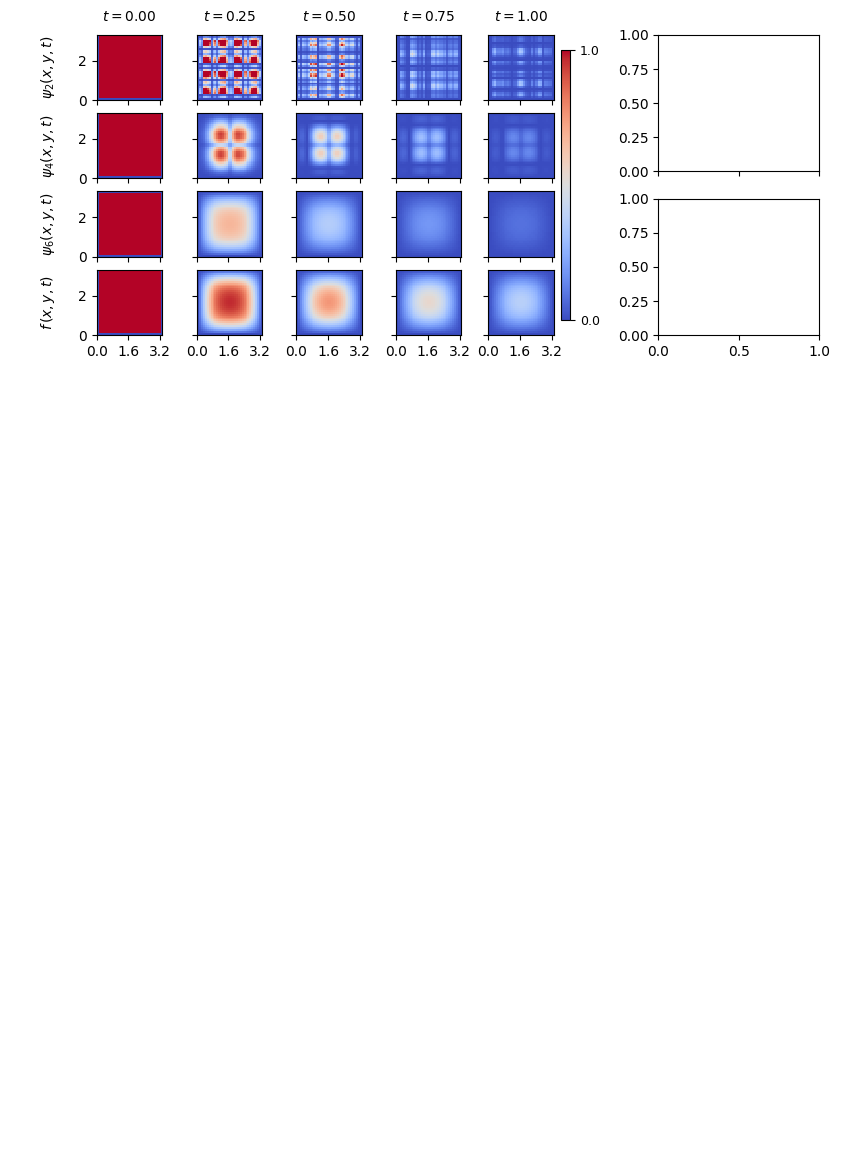

In [480]:
num_evos = 5
evo_times = np.linspace(1,Nt-1,num_evos, dtype=np.int32)-1

Nt = 1001
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

vlim = [1.0, 2.0, 3.5]

fig = plt.figure(figsize=(a4_width,a4_height))

subfigs = fig.subfigures(3,1,height_ratios=[1,1,1])

for i,sfig in enumerate(subfigs):
    evo_fig, stat_fig = sfig.subfigures(1,2,width_ratios=[3,1])
    evo_axs = evo_fig.subplots(expt_datas[0].D_list.shape[0]+1, num_evos, sharex=True,sharey=True)
    stat_axs = stat_fig.subplots(2,1,sharex=True)
    for ax in evo_axs.flatten():
        ax.set_aspect(1)
        # ax.tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
        # ax.tick_params(left=False, labelleft=False, right=False, labelright=False)
    
    #Plot data
    if i == 2:
        break

    for j,ti in enumerate(evo_times):
        t = ti*expt_datas[i].dt
        for Di,D in enumerate(expt_datas[0].D_list):
            plot_2d_state(evo_axs[Di,j],
                          expt_datas[i].qite_sols[Di,ti,:] if ti > 0 else expt_datas[i].f0, 
                          expt_datas[i].num_qbits, expt_datas[i].periodic_bc_flag, 
                          expt_datas[i].L,
                          vmin=0.0,
                          vmax=vlim[i])
        plot_2d_state(evo_axs[-1,j],
                      expt_datas[i].analytical_sol[ti,:] if ti > 0 else expt_datas[i].f0, 
                      expt_datas[i].num_qbits, expt_datas[i].periodic_bc_flag, 
                      expt_datas[i].L,
                      vmin=0.0,
                      vmax=vlim[i])
        evo_axs[0,j].set_title(f'${t=:0.2f}$',pad=10,fontsize=10)
    for Di,D in enumerate(expt_datas[0].D_list):
        evo_axs[Di,0].set_ylabel(f'$\\psi_{D}(x,y,t)$',labelpad=15)#rotation=90,ha='right',va='center')
    evo_axs[-1,0].set_ylabel(r'$f\,(x,y,t)$',labelpad=15)#rotation=90,ha='right',va='center')
    
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0.0,vlim[i]), cmap='coolwarm'),
                        ax=evo_axs[:,-1].ravel().tolist(),
                        location='right',orientation='vertical',
                        shrink=0.9,
                        aspect=30,anchor=(1,0.5))
    cb.set_ticks([0.0,vlim[i]])
    cb.set_ticklabels([f'{0.0:0.1f}', f'{vlim[i]:0.1f}'],fontsize=9)

    evo_axs[0,0].set_xlim([0.0,expt_datas[i].L[0]])
    evo_axs[0,0].set_ylim([0.0,expt_datas[i].L[1]])

    evo_axs[0,0].set_xticks(np.arange(0.0,expt_datas[i].L[0]+0.1,1.6))
    evo_axs[0,0].set_yticks(np.arange(0.0,expt_datas[i].L[1]+0.1,1.6))

    evo_axs[0,0].set_xticks(np.arange(0.0,expt_datas[i].L[0]+expt_datas[i].dx[0],expt_datas[i].dx[0]),minor=True)
    evo_axs[0,0].set_yticks(np.arange(0.0,expt_datas[i].L[1]+expt_datas[i].dx[1],expt_datas[i].dx[1]),minor=True)
    
    for Di,D in enumerate(expt_datas[i].D_list):
        stat_axs[0].plot(times[time_slice], expt_datas[i].stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
        stat_axs[1].plot(times[time_slice], expt_datas[i].stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5)#, label=f'{D=}')

    stat_fig.legend(ncols=3, loc='center',fontsize=9,columnspacing=0.5,fancybox=False,shadow=True)
    # statAxs[1].legend(loc='upper left')#, fancybox=True, shadow=True)

    stat_axs[0].set_ylabel('$F(t)$',fontsize=12)
    stat_axs[1].set_ylabel('MSE$(t)$',fontsize=12)

    stat_axs[0].grid(True,axis='y')
    stat_axs[1].grid(True,axis='y')

figname = '2d_solutions'

plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight') 

plt.show()


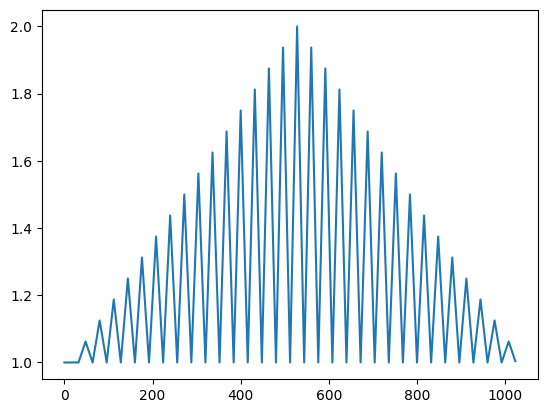

In [437]:
plt.plot(np.arange(2**10),expt_datas[1].f0)